In [164]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [165]:
# Load the CO2 concentration data
country = 'India'
df = pd.read_csv("C:\\Users\\mohdz\\OneDrive\\Desktop\\Mini_Project\\data\\processed\\co2_country.csv", index_col='year', parse_dates=True)
df = df.loc[df['country'] == country, ['co2']]
df.head()

,co2
year,
1950-01-01,61.103
1951-01-01,64.022
1952-01-01,67.426
1953-01-01,68.705
1954-01-01,72.414


In [166]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df['co2'].values.reshape(-1, 1))

In [167]:
train_size = int(len(data) * 0.9)
train_data, test_data = data[:train_size,:], data[train_size:,:]

In [168]:
# Create the training and testing datasets
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset)-time_steps):
        a = dataset[i:(i+time_steps), 0]
        X.append(a)
        Y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(Y)

In [169]:

time_steps = 1 
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

In [170]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', run_eagerly=True)

In [171]:
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 63ms/step - loss: 0.0752
Epoch 2/100
1/1 [==============================] - 0s 62ms/step - loss: 0.0735
Epoch 3/100
1/1 [==============================] - 0s 62ms/step - loss: 0.0717
Epoch 4/100
1/1 [==============================] - 0s 54ms/step - loss: 0.0700
Epoch 5/100
1/1 [==============================] - 0s 60ms/step - loss: 0.0683
Epoch 6/100
1/1 [==============================] - 0s 64ms/step - loss: 0.0666
Epoch 7/100
1/1 [==============================] - 0s 57ms/step - loss: 0.0649
Epoch 8/100
1/1 [==============================] - 0s 57ms/step - loss: 0.0633
Epoch 9/100
1/1 [==============================] - 0s 65ms/step - loss: 0.0617
Epoch 10/100
1/1 [==============================] - 0s 60ms/step - loss: 0.0601
Epoch 11/100
1/1 [==============================] - 0s 56ms/step - loss: 0.0585
Epoch 12/100
1/1 [==============================] - 0s 49ms/step - loss: 0.0569
Epoch 13/100
1/1 [==============================]

In [172]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])


1/1 [==============================] - 0s 29ms/step
Train Score: 681.54 RMSE
Test Score: 226.81 RMSE


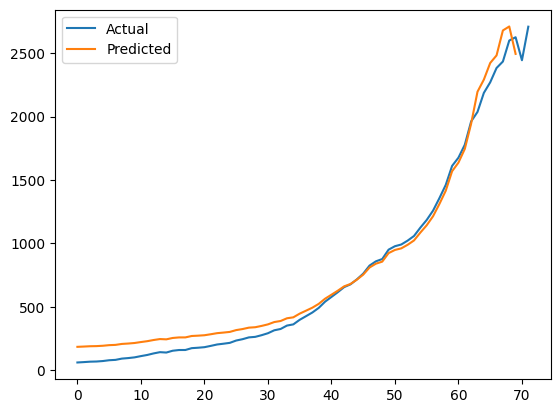

In [173]:
import matplotlib.pyplot as plt
plt.plot(df['co2'].values, label='Actual')
plt.plot(np.concatenate([train_predictions, test_predictions]), label='Predicted')
plt.legend()
plt.show()

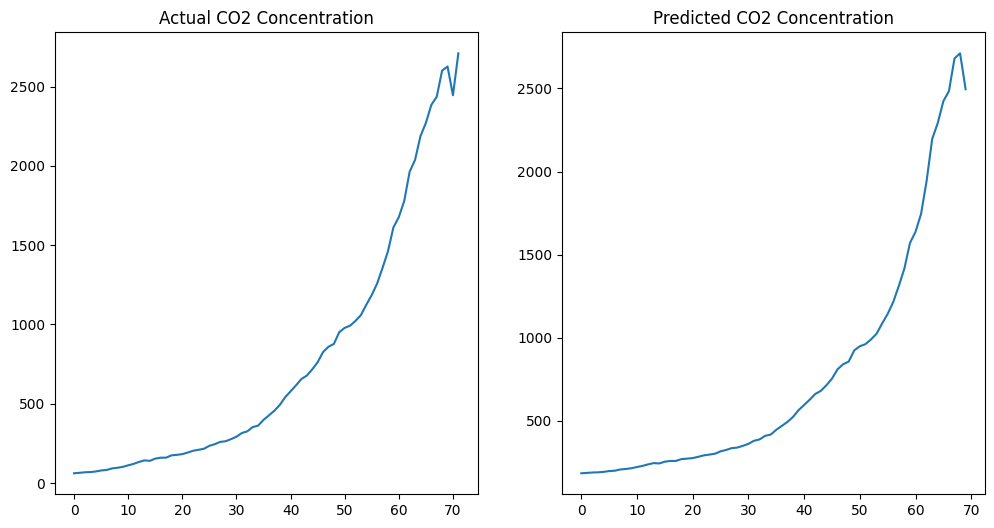

In [174]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(df['co2'].values)
ax1.set_title('Actual CO2 Concentration')

ax2.plot(np.concatenate([train_predictions, test_predictions]))
ax2.set_title('Predicted CO2 Concentration')

plt.show()
